### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상 문    
열 변수 
quantity: 거래당 각 제품(항목  )의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  

In [1]:
import pandas as pd

cs_df = pd.read_csv('./datasets/customer_shopping_data.csv')
cs_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [2]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


### 결측치 검사

In [3]:
cs_df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

### 중복행 검사

In [4]:
cs_df.duplicated().sum()

0

In [5]:
cs_df['age'].value_counts().sort_index(ascending=True)

age
18    1844
19    1936
20    1844
21    1947
22    2051
23    1897
24    1977
25    1863
26    1896
27    1950
28    1953
29    1885
30    1981
31    1866
32    1891
33    1913
34    1883
35    1841
36    1954
37    2057
38    1954
39    1947
40    1960
41    1892
42    1892
43    2000
44    1904
45    1876
46    1911
47    1880
48    1955
49    1883
50    1873
51    1993
52    1945
53    1903
54    1830
55    1843
56    1916
57    1879
58    1875
59    1874
60    1874
61    1945
62    1909
63    1886
64    2002
65    1856
66    1876
67    1901
68    1893
69    1901
Name: count, dtype: int64

In [6]:
cs_df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

In [7]:
cs_df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [8]:
cs_df['quantity'].describe()

count    99457.000000
mean         3.003429
std          1.413025
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: quantity, dtype: float64

In [9]:
cs_df['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [10]:
cs_df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [11]:
cs_df['price'].value_counts()

price
600.16     6950
1500.40    6940
900.24     6907
1200.32    6849
300.08     6841
121.98     3072
203.30     3055
162.64     3010
5.23       3002
15.69      2992
26.15      2989
40.66      2986
81.32      2974
10.46      2909
20.92      2884
107.52     2082
143.36     2076
1200.34    2045
2400.68    2022
3000.85    2013
1800.51    2010
35.84      2000
179.20     1971
71.68      1958
600.17     1944
35.19      1077
75.75      1029
11.73      1024
3150.00    1009
30.30      1008
4200.00    1001
5250.00    1001
2100.00    1000
45.45      1000
58.65       992
15.15       985
1050.00     985
23.46       984
60.60       959
46.92       922
Name: count, dtype: int64

In [12]:
cs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.00,30.00,43.0,56.00,69.0
quantity,99457.0,3.003429,1.413025,1.00,2.00,3.0,4.00,5.0
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


In [13]:
cs_df['customer_id'].duplicated().sum()

0

In [14]:
cs_df['invoice_date'].sort_values()

36199    1/1/2021
45626    1/1/2021
74986    1/1/2021
9456     1/1/2021
36006    1/1/2021
           ...   
5443     9/9/2022
92297    9/9/2022
45393    9/9/2022
5555     9/9/2022
15220    9/9/2022
Name: invoice_date, Length: 99457, dtype: object

In [15]:
cs_df['invoice_date'] = pd.to_datetime(cs_df['invoice_date'], dayfirst=True)
cs_df.sort_values(by='invoice_date')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
36199,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
78539,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul
27812,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity
27856,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul
5323,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
20863,I218048,C389917,Female,66,Clothing,5,1500.40,Cash,2023-03-08,Mall of Istanbul
20879,I268432,C175797,Female,37,Food & Beverage,3,15.69,Cash,2023-03-08,Kanyon
61644,I200744,C224026,Female,59,Cosmetics,5,203.30,Credit Card,2023-03-08,Kanyon
27871,I124836,C265661,Female,46,Shoes,3,1800.51,Credit Card,2023-03-08,Metrocity


In [16]:
cs_r_df = cs_df.copy()
cs_r_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


In [17]:
cs_r_df['Recency'] = cs_df['invoice_date'].apply(lambda x: (pd.to_datetime('2023-03-09') - x).days)
cs_r_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Recency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,216
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,452
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,485
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,662
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,501
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,169
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,533
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,711
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,723


In [18]:
rf_df = cs_r_df.groupby('customer_id').agg(Recency=('Recency', 'min'), Frequency=('quantity', 'sum')).reset_index()
rf_df

,customer_id,Recency,Frequency
0,C100004,468,5
1,C100005,6,2
2,C100006,98,3
3,C100012,571,5
4,C100019,592,1
...,...,...,...
99452,C999886,1,3
99453,C999910,124,3
99454,C999974,303,5
99455,C999976,262,3


In [19]:
cs_m_df = cs_df.copy()
cs_m_df['Monetary'] = cs_m_df['quantity'] * cs_m_df['price']
cs_m_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Monetary
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00


In [20]:
m_df = cs_m_df.groupby('customer_id')[['Monetary']].sum().reset_index()
m_df

,customer_id,Monetary
0,C100004,7502.00
1,C100005,2400.68
2,C100006,322.56
3,C100012,130.75
4,C100019,35.84
...,...,...
99452,C999886,47.07
99453,C999910,136.35
99454,C999974,7502.00
99455,C999976,322.56


In [21]:
rfm_df = rf_df.merge(m_df, on='customer_id')
rfm_df

,customer_id,Recency,Frequency,Monetary
0,C100004,468,5,7502.00
1,C100005,6,2,2400.68
2,C100006,98,3,322.56
3,C100012,571,5,130.75
4,C100019,592,1,35.84
...,...,...,...,...
99452,C999886,1,3,47.07
99453,C999910,124,3,136.35
99454,C999974,303,5,7502.00
99455,C999976,262,3,322.56


In [22]:
rfm_df[rfm_df['Monetary'] <= 0]

,customer_id,Recency,Frequency,Monetary


In [23]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [24]:
rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df

,customer_id,Recency,Frequency,Monetary
0,C100004,0.586683,1.00,0.285648
1,C100005,0.006281,0.25,0.091273
2,C100006,0.121859,0.50,0.012091
3,C100012,0.716080,1.00,0.004783
4,C100019,0.742462,0.00,0.001166
...,...,...,...,...
99452,C999886,0.000000,0.50,0.001594
99453,C999910,0.154523,0.50,0.004996
99454,C999974,0.379397,1.00,0.285648
99455,C999976,0.327889,0.50,0.012091


In [25]:
rfm_df['Recency'] = 1 - rfm_df['Recency']

In [26]:
rfm_df

,customer_id,Recency,Frequency,Monetary
0,C100004,0.413317,1.00,0.285648
1,C100005,0.993719,0.25,0.091273
2,C100006,0.878141,0.50,0.012091
3,C100012,0.283920,1.00,0.004783
4,C100019,0.257538,0.00,0.001166
...,...,...,...,...
99452,C999886,1.000000,0.50,0.001594
99453,C999910,0.845477,0.50,0.004996
99454,C999974,0.620603,1.00,0.285648
99455,C999976,0.672111,0.50,0.012091


In [27]:
rfm_df['TotalScore'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']

In [28]:
rfm_df

,customer_id,Recency,Frequency,Monetary,TotalScore
0,C100004,0.413317,1.00,0.285648,1.698965
1,C100005,0.993719,0.25,0.091273,1.334992
2,C100006,0.878141,0.50,0.012091,1.390232
3,C100012,0.283920,1.00,0.004783,1.288702
4,C100019,0.257538,0.00,0.001166,0.258704
...,...,...,...,...,...
99452,C999886,1.000000,0.50,0.001594,1.501594
99453,C999910,0.845477,0.50,0.004996,1.350473
99454,C999974,0.620603,1.00,0.285648,1.906251
99455,C999976,0.672111,0.50,0.012091,1.184202


In [29]:
cs_rfm_df = cs_df.merge(rfm_df[['customer_id', 'TotalScore']], on='customer_id')
cs_rfm_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893


In [30]:
import numpy as np

l1, l2, l3, l4 = np.percentile(cs_rfm_df['TotalScore'], [20, 50, 75, 90])
print(l1, l2, l3, l4)

0.6209409560600792 1.0711955651032863 1.4690652355157057 1.8183114666714846


In [31]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [32]:
cs_rfm_df['Level'] = cs_rfm_df['TotalScore'].apply(get_level)
cs_rfm_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore,Level
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031,3
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194,5
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103,2
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919,2
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256,5
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638,5
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893,2


In [33]:
cs_rfm_df['Level'] = cs_rfm_df['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])

In [34]:
cs_rfm_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore,Level
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548,VIP
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031,Gold
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194,Bronze
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103,Diamond
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919,Diamond
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256,Bronze
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638,Bronze
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893,Diamond


In [35]:
cs_rfm_df = cs_rfm_df.merge(m_df, on='customer_id')
cs_rfm_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore,Level,Monetary
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548,VIP,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031,Gold,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194,Bronze,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103,Diamond,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896,Gold,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919,Diamond,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256,Bronze,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638,Bronze,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893,Diamond,16800.00


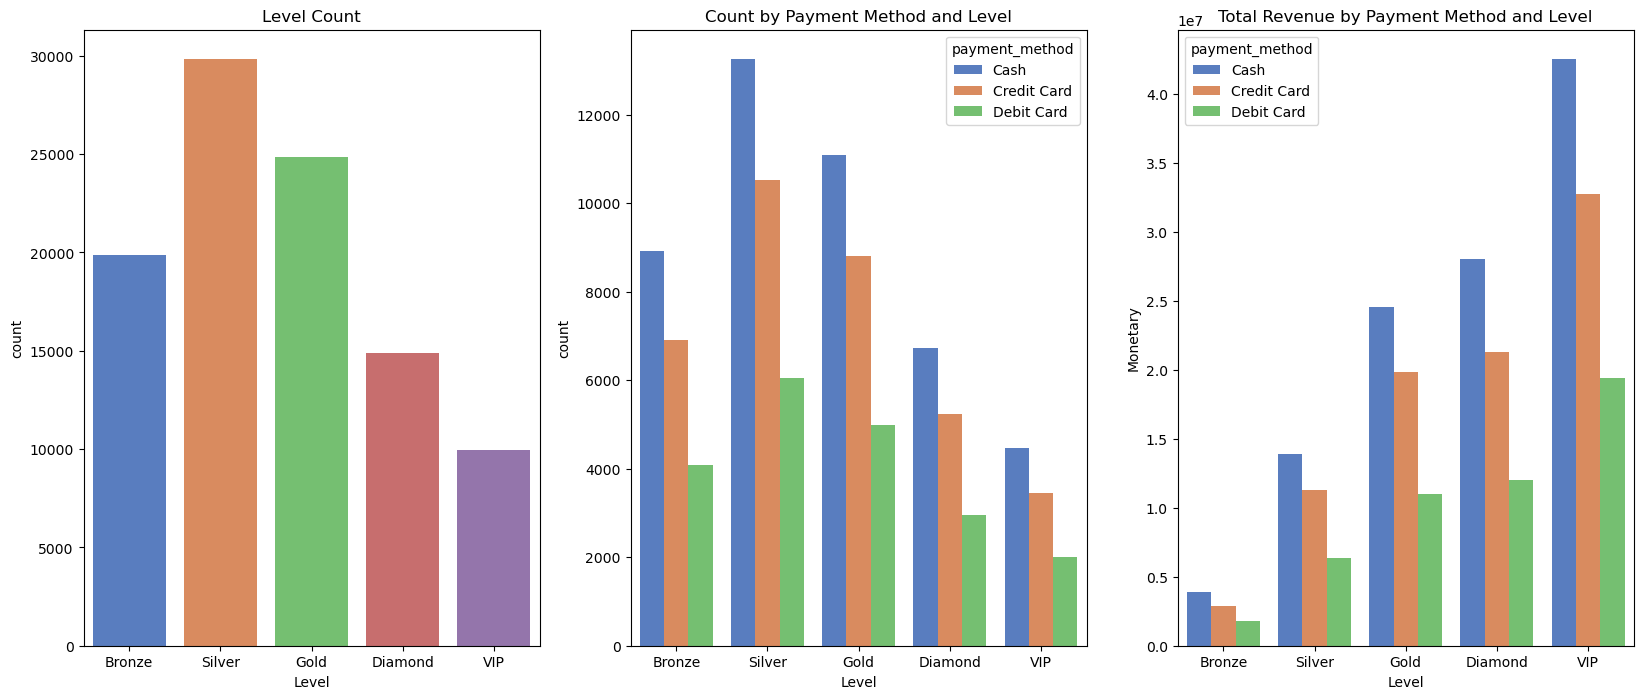

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='Level', data=cs_rfm_df, palette='muted', order=order)
axes[0].set_title('Level Count')

hue_order = ['Cash', 'Credit Card', 'Debit Card']
sns.countplot(ax=axes[1], x='Level', hue='payment_method', data=cs_rfm_df, palette='muted', order=order, hue_order=hue_order)
axes[1].set_title('Count by Payment Method and Level')

Level_payment_method_df = cs_rfm_df.groupby(['Level', 'payment_method'])['Monetary'].sum().reset_index()
sns.barplot(ax=axes[2], x ='Level', y='Monetary', hue='payment_method', data=Level_payment_method_df, palette='muted', order=order, hue_order=hue_order)
axes[2].set_title('Total Revenue by Payment Method and Level')

plt.show()

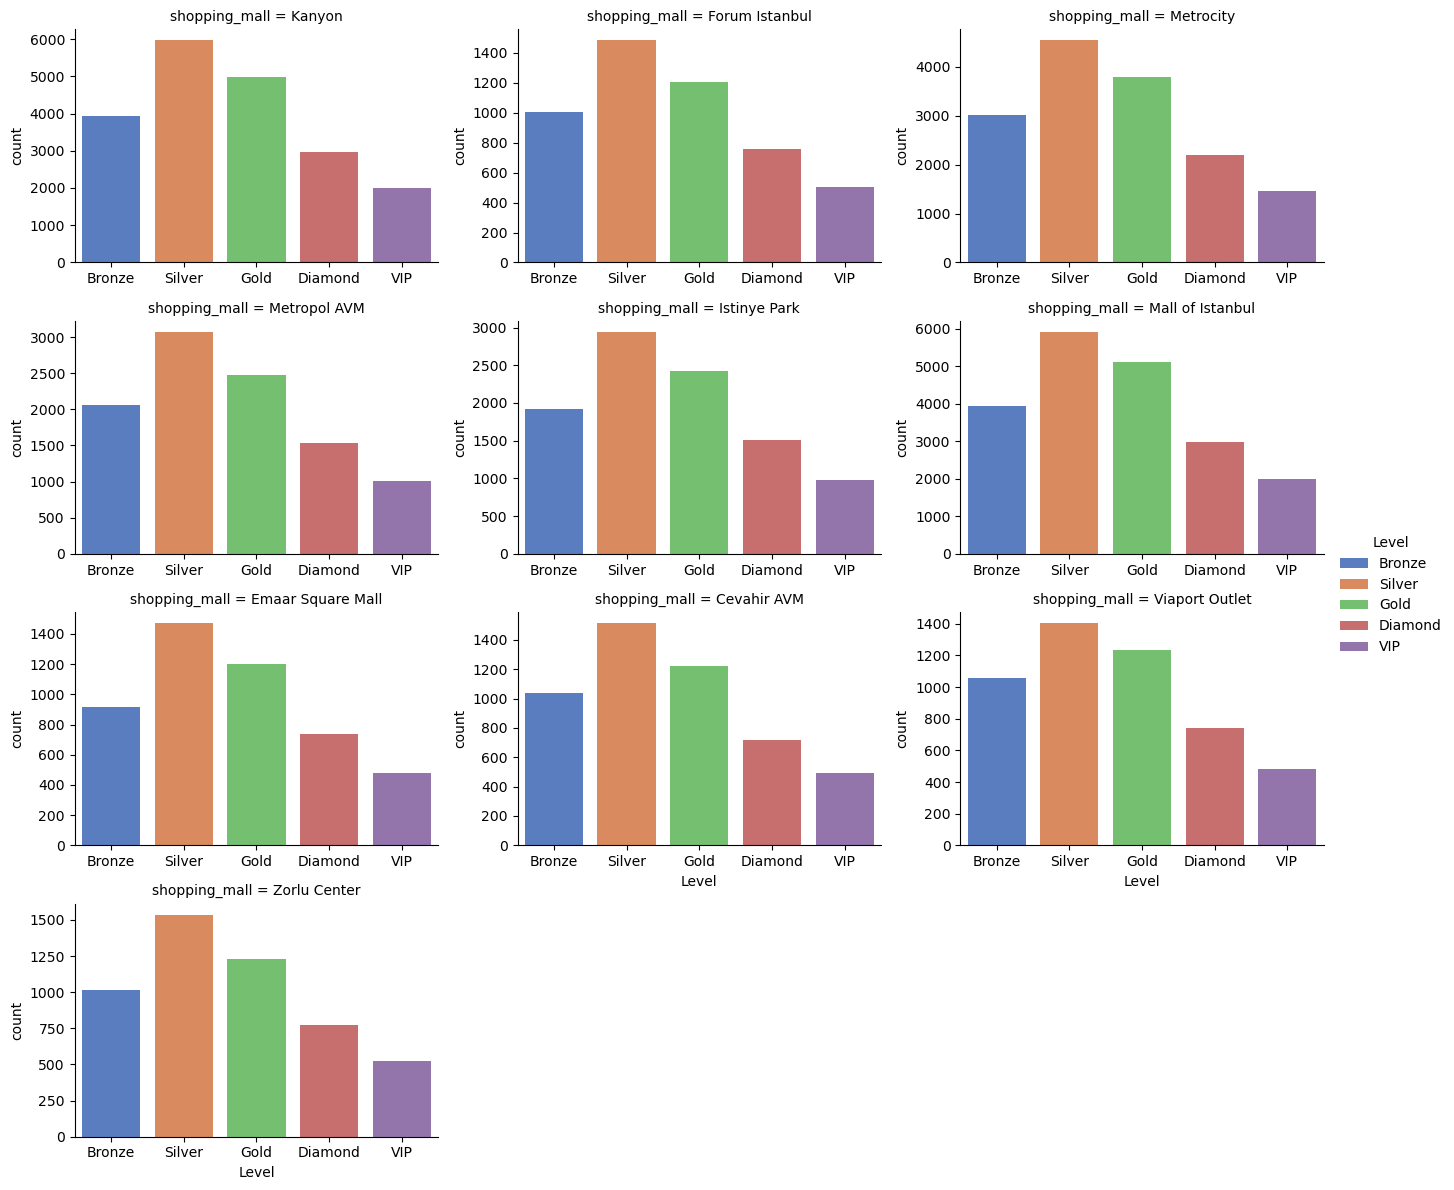

In [37]:
# 쇼핑몰 별 회원의 등급 분포도
order_columbs=['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

g = sns.FacetGrid(
    cs_rfm_df, 
    col='shopping_mall', 
    col_wrap=3, 
    hue='Level', 
    palette='muted', 
    hue_order=order_columbs, 
    sharex=False, 
    sharey=False,
    aspect=1.5
)

g.map(sns.countplot, 'Level', order=order_columbs)

g.add_legend()

plt.show()

In [38]:
def age_group(age):
    if age < 20:
        return '10s'
    if age < 30:
        return '20s'
    if age < 40:
        return '30s'
    if age < 50:
        return '40s'
    if age < 60:
        return '50s'
    return '60s'

In [39]:
cs_rfm_df['age_group'] = cs_rfm_df['age'].apply(age_group)
cs_rfm_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalScore,Level,Monetary,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2.015548,VIP,7502.00,20s
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,1.139031,Gold,5401.53,20s
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,0.403194,Bronze,300.08,20s
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,1.741103,Diamond,15004.25,60s
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,1.130896,Gold,242.40,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,1.799919,Diamond,293.25,40s
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,0.582256,Bronze,20.92,20s
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,0.358638,Bronze,20.92,60s
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1.482893,Diamond,16800.00,50s


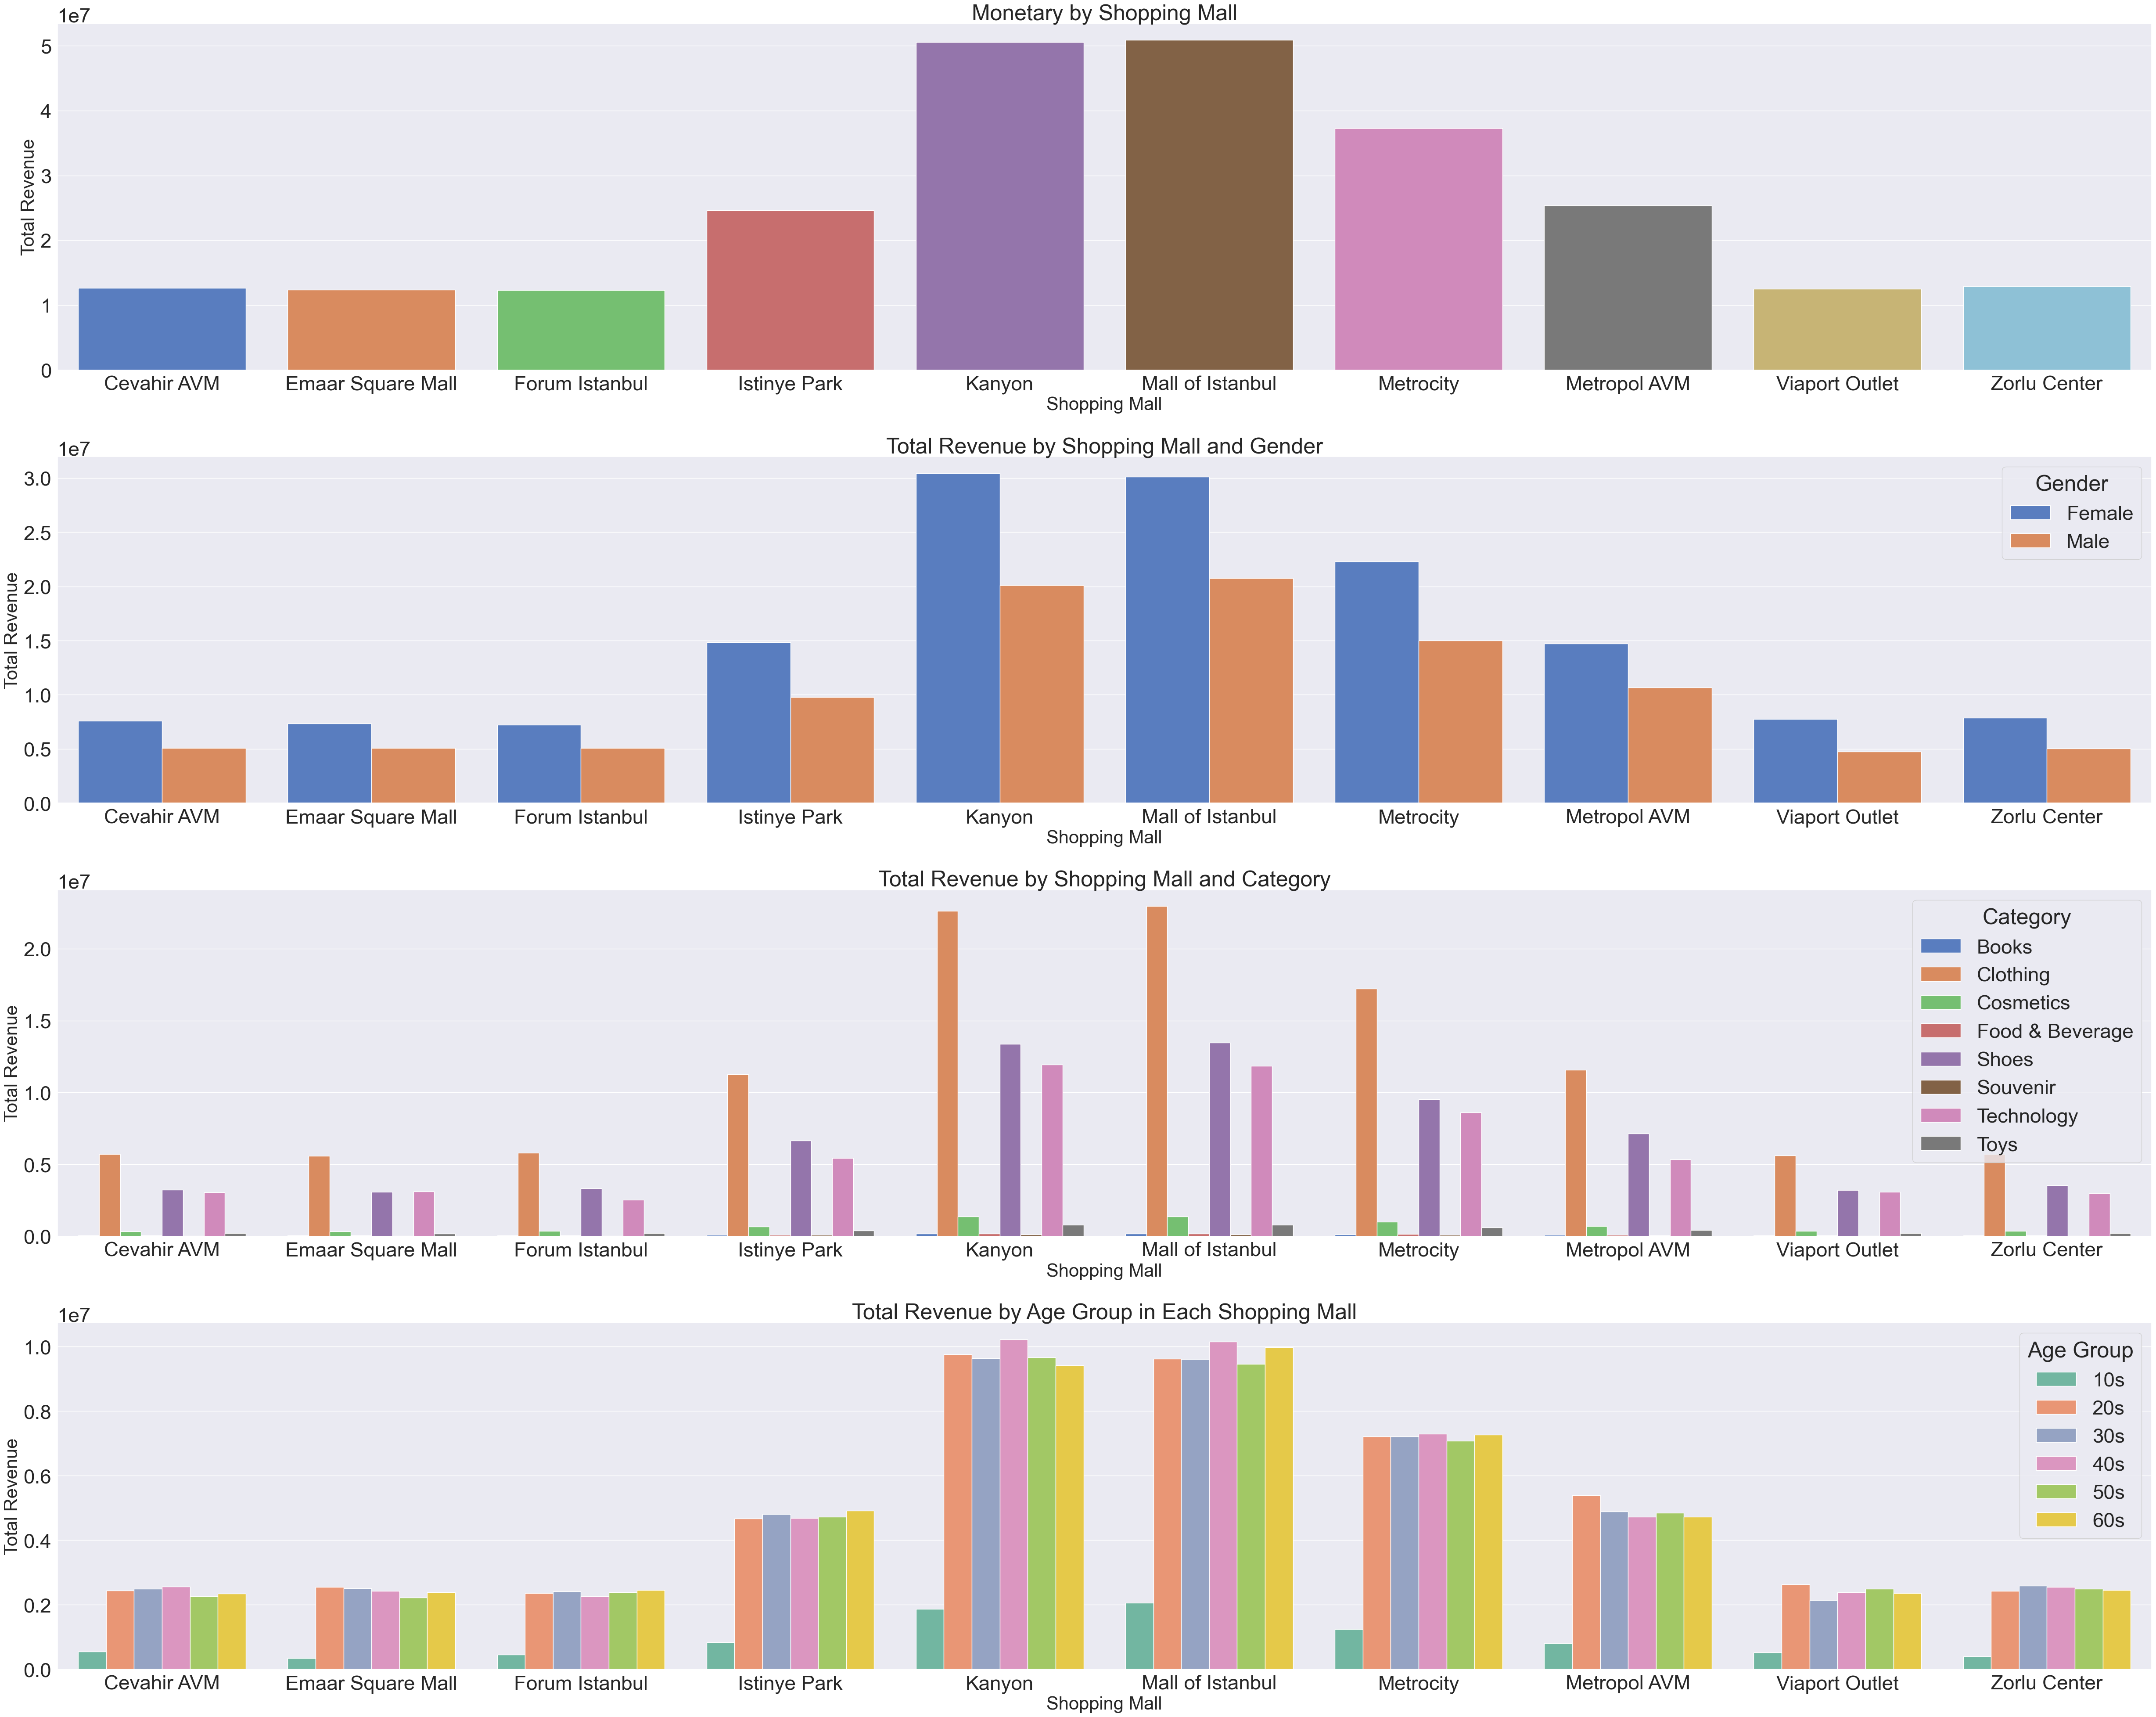

In [40]:
order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# Subplot 설정
sns.set(font_scale=3)
plt.rc('axes', labelsize=30)
fig, axes = plt.subplots(4, 1, figsize=(50, 40))

# 첫 번째 그래프
shopping_mall_df = cs_rfm_df.groupby('shopping_mall')['Monetary'].sum().reset_index()
sns.barplot(x='shopping_mall', y='Monetary', palette='muted', data=shopping_mall_df, ax=axes[0])
axes[0].set_title('Monetary by Shopping Mall')
axes[0].set_xlabel('Shopping Mall')
axes[0].set_ylabel('Total Revenue')

# 두 번째 그래프
shopping_mall_gender_df = cs_rfm_df.groupby(['shopping_mall', 'gender'])['Monetary'].sum().reset_index()
sns.barplot(x='shopping_mall', y='Monetary', hue='gender', data=shopping_mall_gender_df, palette='muted', ax=axes[1])
axes[1].set_title('Total Revenue by Shopping Mall and Gender')
axes[1].set_xlabel('Shopping Mall')
axes[1].set_ylabel('Total Revenue')
axes[1].legend(title='Gender')

# 네 번째 그래프
category_revenue_df = cs_rfm_df.groupby(['shopping_mall', 'category'])['Monetary'].sum().reset_index()
sns.barplot(x='shopping_mall', y='Monetary', hue='category', data=category_revenue_df, palette='muted', ax=axes[2])
axes[2].set_title('Total Revenue by Shopping Mall and Category')
axes[2].set_xlabel('Shopping Mall')
axes[2].set_ylabel('Total Revenue')
axes[2].legend(title='Category')

# 다섯 번째 그래프
age_revenue_df = cs_rfm_df.groupby(['shopping_mall', 'age_group'])['Monetary'].sum().reset_index()
sns.barplot(x='shopping_mall', y='Monetary', hue='age_group', data=age_revenue_df, palette='Set2', ax=axes[3])
axes[3].set_title('Total Revenue by Age Group in Each Shopping Mall')
axes[3].set_xlabel('Shopping Mall')
axes[3].set_ylabel('Total Revenue')
axes[3].legend(title='Age Group')

# 여섯 번째 그래프

plt.tight_layout()
plt.show()

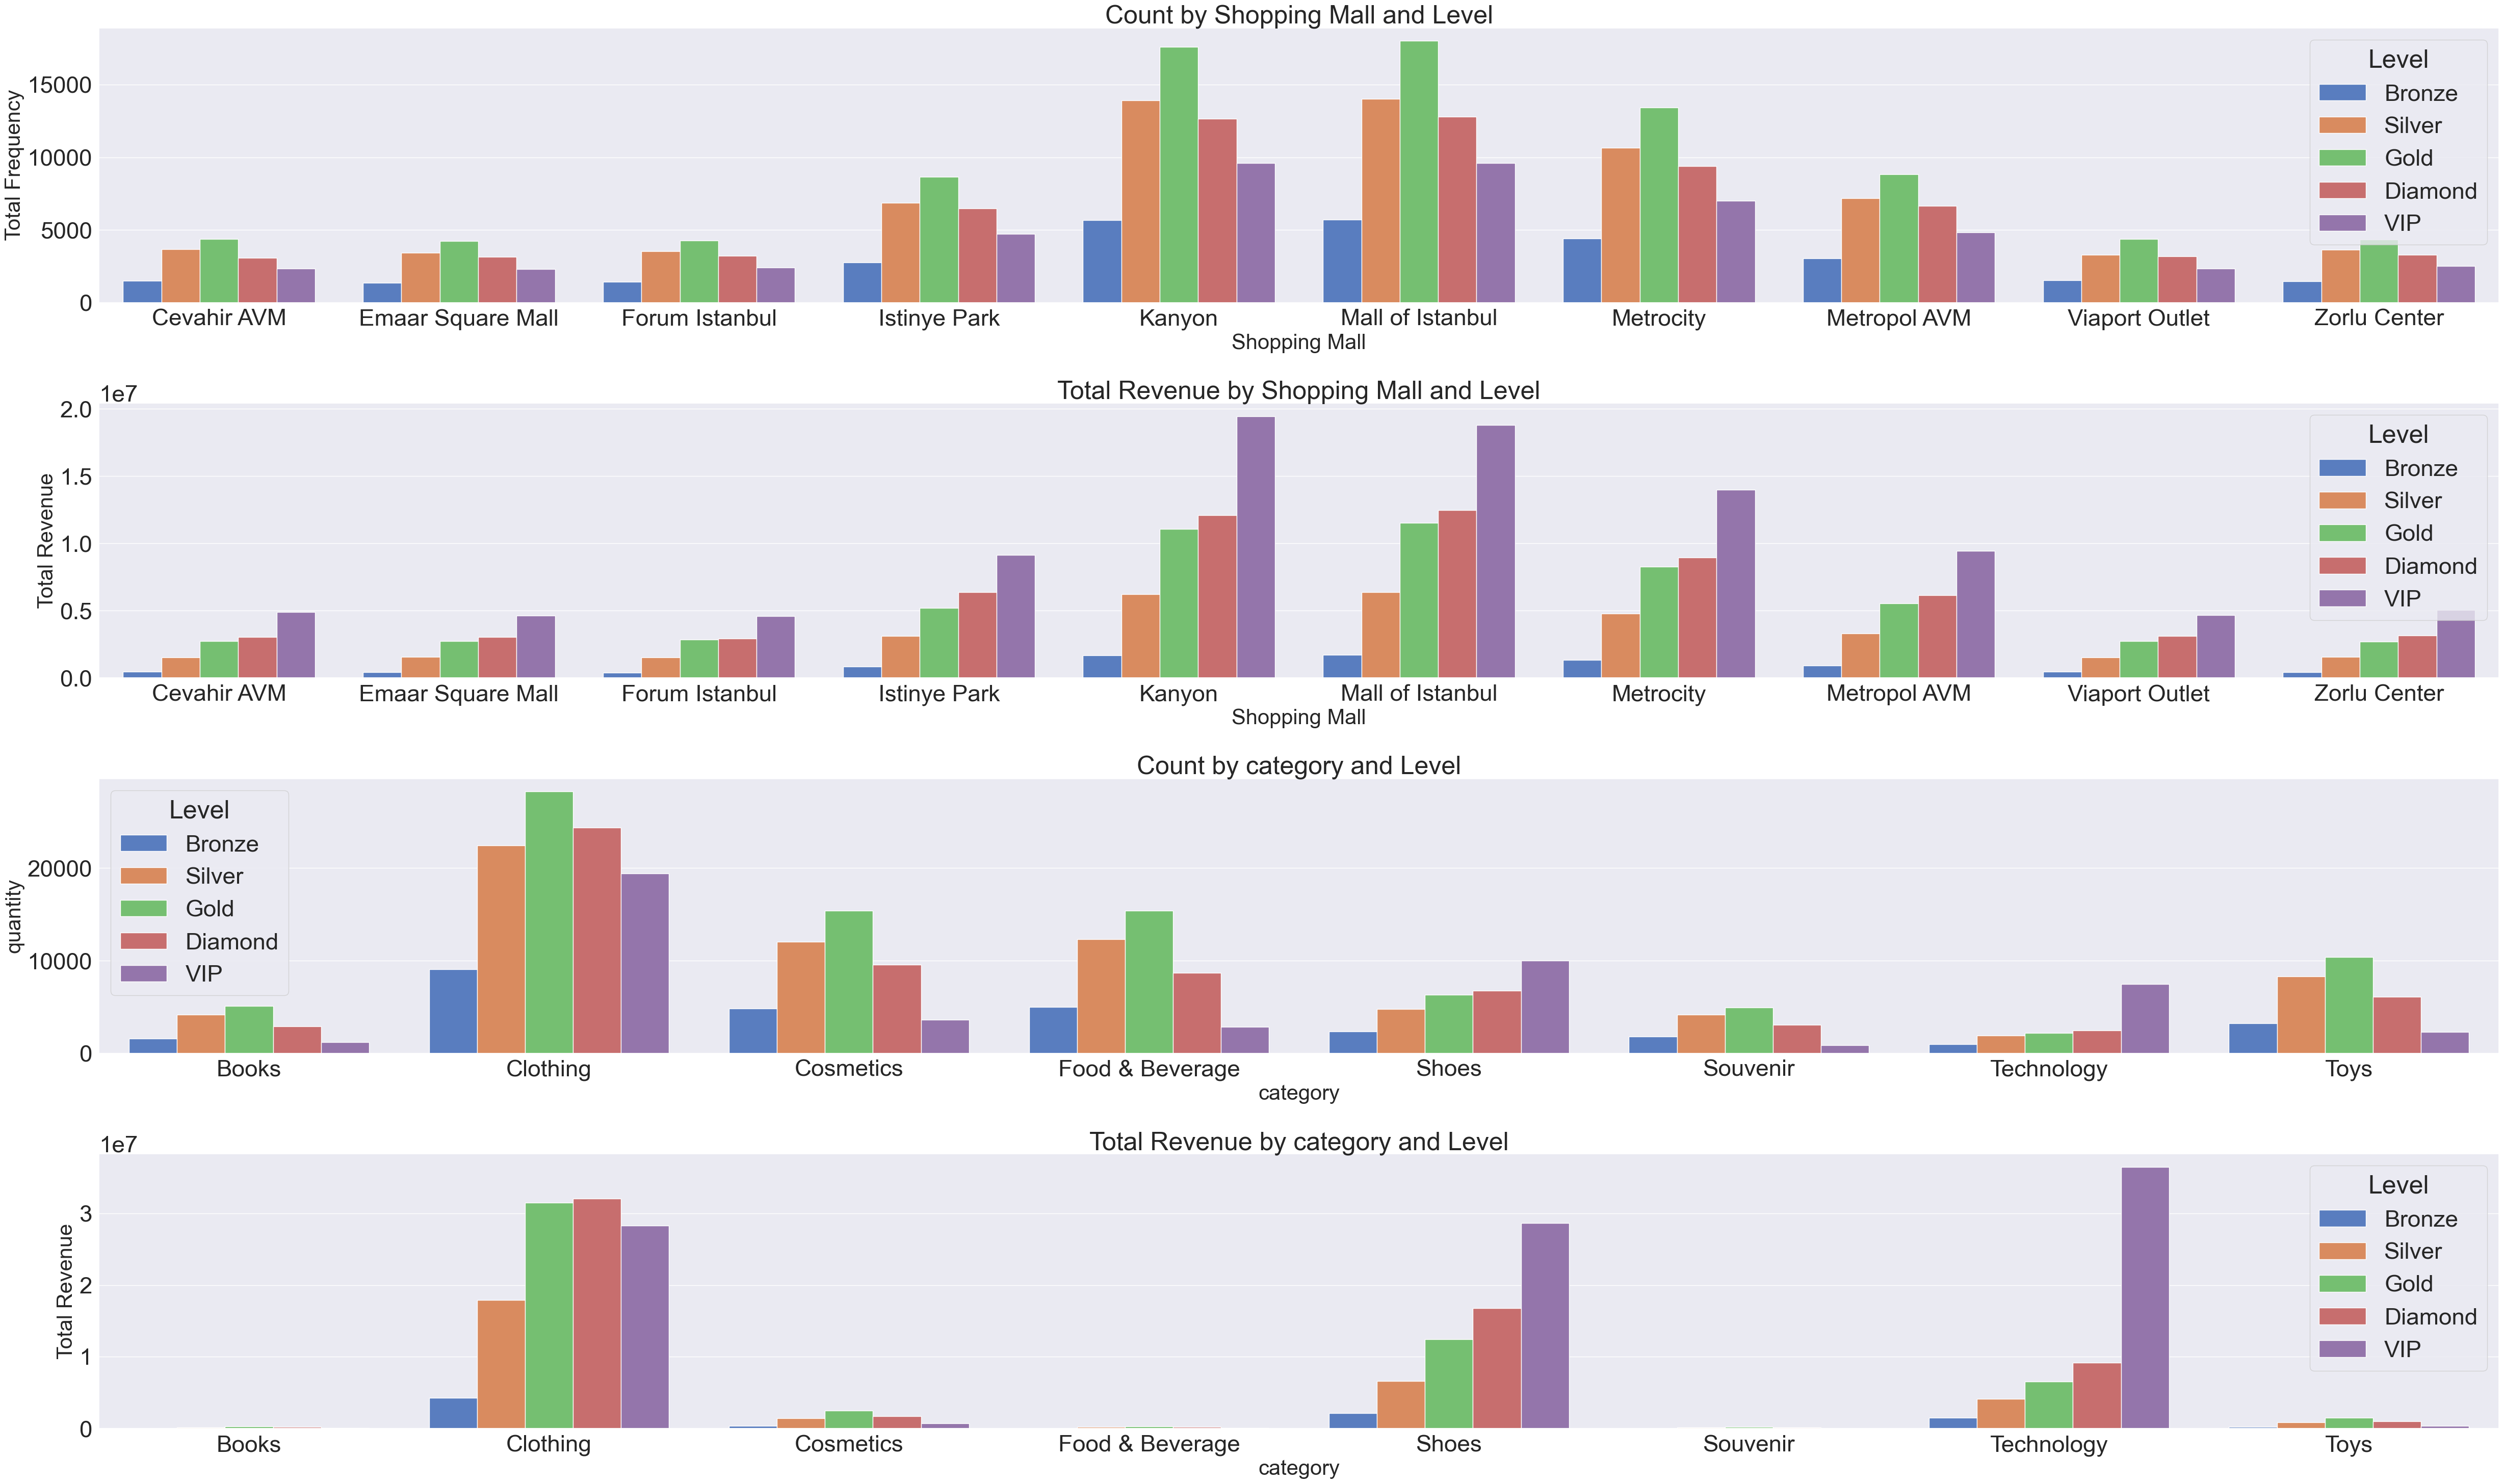

In [41]:
fig, axes = plt.subplots(4, 1, figsize=(50, 30))

shopping_mall_level_df1 = cs_rfm_df.groupby(['shopping_mall', 'Level'])['quantity'].sum().reset_index()
sns.barplot(x='shopping_mall', y='quantity', hue='Level', data=shopping_mall_level_df1, hue_order=order_columns, palette='muted', ax=axes[0])
axes[0].set_title('Count by Shopping Mall and Level')
axes[0].set_xlabel('Shopping Mall')
axes[0].set_ylabel('Total Frequency')
axes[0].legend(title='Level')

shopping_mall_level_df2 = cs_rfm_df.groupby(['shopping_mall', 'Level'])['Monetary'].sum().reset_index()
sns.barplot(x='shopping_mall', y='Monetary', hue='Level', data=shopping_mall_level_df2, hue_order=order_columns, palette='muted', ax=axes[1])
axes[1].set_title('Total Revenue by Shopping Mall and Level')
axes[1].set_xlabel('Shopping Mall')
axes[1].set_ylabel('Total Revenue')
axes[1].legend(title='Level')

category_level_df1 = cs_rfm_df.groupby(['category', 'Level'])['quantity'].sum().reset_index()
sns.barplot(x='category', y='quantity', hue='Level', data=category_level_df1, hue_order=order_columns, palette='muted', ax=axes[2])
axes[2].set_title('Count by category and Level')
axes[2].set_xlabel('category')
axes[2].legend(title='Level')

category_level_df2 = cs_rfm_df.groupby(['category', 'Level'])['Monetary'].sum().reset_index()
sns.barplot(x='category', y='Monetary', hue='Level', data=category_level_df2, hue_order=order_columns, palette='muted', ax=axes[3])
axes[3].set_title('Total Revenue by category and Level')
axes[3].set_xlabel('category')
axes[3].set_ylabel('Total Revenue')
axes[3].legend(title='Level')

plt.tight_layout()
plt.show()

### 마케팅 전략 제안

- 터키 시장 분석 결과에 따르면, 카드 결제에 비해 현금 결제가 더 선호되고 있습니다.  
  마케팅 전략으로는 현금 결제고객을 대상으로 특별 할인, 독점 이벤트 참여, 특별 사은품을 제공하여 현금 결제의 매력을 강조하고  
  이를 통해 고객 유치와 매출 증대를 목표로 할 수 있습니다.  
  이와 함께 현금 결제의 이점을 홍보하는 캠페인을 통해 이러한 혜택을 명확히 전달하여 고객 만족도를 향상시킬 수 있습니다.

- 'Kanyon', 'Mall of Istanbul', 'Metrocity' 쇼핑몰들이 높은 수익을 기록한 반면, 다른 쇼핑몰들은 상대적으로 수익이 적은 것으로 나타났습니다.  
  상세 데이터 분석을 통해서도 연령, 성별, 카테고리 별로 뚜렷한 차이를 찾을 수 없었으므로, 이들 쇼핑몰의 성공은 우수한 위치, 브랜드 인지도 등의 영향일 것으로 추정됩니다.  
  마케팅 전략은 이러한 강점을 더 부각시키는 동시에, 다른 쇼핑몰들의 경쟁력 강화를 위한 방안을 모색해야 할 것입니다.  
  예를 들어, 인지도를 높이고 새로운 고객층을 유치하기 위한 마케팅 캠페인이나 이벤트를 진행하는 것이 효과적일 수 있습니다.

- 거래 빈도가 높은 'Gold'등급과 높은 소비를 기록하는 'Diamond' 및 'VIP'등급 고객을 위한 전략으로,  
  'Gold' 등급의 잦은 방문을 이용한 매장 내 이벤트를 강화하고, 'Diamond'와 'VIP' 고객에게는 고급 상품과 독점적 경험을 제공합니다.  
  동시에 의류, 화장품, 식음료 같은 인기 카테고리에 대한 마케팅을 증대시키며, 높은 수익성을 가진 기술, 신발, 의류 상품에 대한 투자를 확대하여 매출 증대를 목표로 한다면 효과를 볼 수 있을거 같습니다.